In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
file_path_train = r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\train_data.csv'
file_path_test = r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\test_data.csv'

In [3]:
train_data = pd.read_csv(file_path_train, index_col = ['Date'])
test_data = pd.read_csv(file_path_test, index_col = ['Date'])

In [4]:
train_data.head()

,confirmed,High,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,
2020-01-23,1,57.980000,227900.0,54.500458,-0.386795
2020-01-24,2,57.799999,146200.0,53.924980,-0.575478
2020-01-27,5,55.689999,230600.0,52.151379,-1.773602
2020-01-28,5,56.090000,174400.0,52.358929,0.207550
2020-01-29,5,55.900002,214500.0,52.104210,-0.254719


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 2020-01-23 to 2020-06-17
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   confirmed             102 non-null    int64  
 1   High                  102 non-null    float64
 2   Volume                102 non-null    float64
 3   adjusted_close        102 non-null    float64
 4   first_diff_adj_stock  102 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.8+ KB


In [6]:
train_data.index

Index(['2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
       ...
       '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
       '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16', '2020-06-17'],
      dtype='object', name='Date', length=102)

In [7]:
train_data.index = pd.DatetimeIndex(train_data.index).to_period('B').dropna()

In [8]:
train_data.index

PeriodIndex(['2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
             '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03',
             '2020-02-04', '2020-02-05',
             ...
             '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09',
             '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-15',
             '2020-06-16', '2020-06-17'],
            dtype='period[B]', name='Date', length=102, freq='B')

# AR Model 

### Optimal Lag Selection 

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [77]:
import statsmodels.api as sm

In [81]:
#ADF-test Original Data
res = sm.tsa.adfuller(train_data['adjusted_close'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.11598416517321397


In [86]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(train_data['adjusted_close'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:2.2463937445899166e-21


In [78]:
train_data

,confirmed,High,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,
2020-01-23,1,57.980000,227900.0,54.500458,-0.386795
2020-01-24,2,57.799999,146200.0,53.924980,-0.575478
2020-01-27,5,55.689999,230600.0,52.151379,-1.773602
2020-01-28,5,56.090000,174400.0,52.358929,0.207550
2020-01-29,5,55.900002,214500.0,52.104210,-0.254719
...,...,...,...,...,...
2020-06-11,2023656,45.169998,247500.0,43.849998,-2.490002
2020-06-12,2048986,44.590000,244300.0,44.110001,0.260002
2020-06-15,2114026,44.090000,154800.0,43.599998,-0.510002


<Figure size 864x576 with 0 Axes>

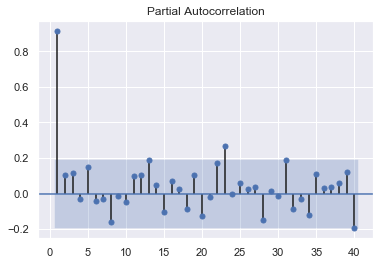

In [55]:
# PACF of differenced data

plt.figure(figsize = (12, 8))
plot_pacf(train_data.adjusted_close, lags = 40, zero = False, method = ('ols'))
plt.show()

# Fiting the AR Model

In [11]:
from statsmodels.tsa.arima_model import ARMA

### Check the Model Performance

In [12]:
from scipy.stats.distributions import chi2 

# define function to compare the likelihood ratio

def LLR_test(model1, model2, DF = 1):
    L1 = model1.llf
    L2 = model2.llf
    LR = 2 *(L2 - L1)
    p = chi2.sf(LR, DF).round(3)
    
    return p 

In [47]:
# AR ORDER 1
ar1_model = ARMA(train_data.adjusted_close, order = (1, 0))
result_ar1 = ar1_model.fit()
print(result_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(1, 0)   Log Likelihood                -168.089
Method:                       css-mle   S.D. of innovations              1.245
Date:                Mon, 27 Jul 2020   AIC                            342.177
Time:                        16:13:43   BIC                            350.052
Sample:                    01-23-2020   HQIC                           345.366
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.3919      1.696     27.937      0.000      44.067      50.717
ar.L1.adjusted_close     0.9350      0.037     24.960      0.000       0.862       1.008
            

In [48]:
# AR ORDER 2
ar2_model = ARMA(train_data.adjusted_close, order = (2, 0))
result_ar2 = ar2_model.fit()
print(result_ar2.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar1, result_ar2)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(2, 0)   Log Likelihood                -167.375
Method:                       css-mle   S.D. of innovations              1.235
Date:                Mon, 27 Jul 2020   AIC                            342.750
Time:                        16:13:48   BIC                            353.250
Sample:                    01-23-2020   HQIC                           347.002
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.5404      1.976     24.055      0.000      43.667      51.414
ar.L1.adjusted_close     0.8264      0.098      8.456      0.000       0.635       1.018
ar.L2.adjust

In [49]:
# AR ORDER 3
ar3_model = ARMA(train_data.adjusted_close, order = (3, 0))
result_ar3 = ar3_model.fit()
print(result_ar3.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar2, result_ar3)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(3, 0)   Log Likelihood                -167.344
Method:                       css-mle   S.D. of innovations              1.235
Date:                Mon, 27 Jul 2020   AIC                            344.688
Time:                        16:14:02   BIC                            357.813
Sample:                    01-23-2020   HQIC                           350.003
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.5655      2.035     23.373      0.000      43.577      51.554
ar.L1.adjusted_close     0.8231      0.099      8.348      0.000       0.630       1.016
ar.L2.adjust

In [50]:
# AR ORDER 5
ar5_model = ARMA(train_data.adjusted_close, order = (5, 0))
result_ar5 = ar5_model.fit()
print(result_ar5.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar3, result_ar5, DF = 2)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(5, 0)   Log Likelihood                -166.035
Method:                       css-mle   S.D. of innovations              1.218
Date:                Mon, 27 Jul 2020   AIC                            346.071
Time:                        16:14:20   BIC                            364.446
Sample:                    01-23-2020   HQIC                           353.511
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.6359      2.200     21.654      0.000      43.324      51.948
ar.L1.adjusted_close     0.8358      0.098      8.570      0.000       0.645       1.027
ar.L2.adjust

In [51]:
# AR ORDER 10
ar10_model = ARMA(train_data.adjusted_close, order = (10, 0))
result_ar10 = ar10_model.fit()
print(result_ar10.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar5, result_ar10, DF = 5)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                    ARMA(10, 0)   Log Likelihood                -164.067
Method:                       css-mle   S.D. of innovations              1.193
Date:                Mon, 27 Jul 2020   AIC                            352.134
Time:                        16:14:33   BIC                            383.634
Sample:                    01-23-2020   HQIC                           364.890
                         - 06-17-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    47.3100      1.635     28.928      0.000      44.105      50.515
ar.L1.adjusted_close      0.8395      0.098      8.607      0.000       0.648       1.031
ar.L2.ad

In [52]:
# AR ORDER 15
ar15_model = ARMA(train_data.adjusted_close, order = (15, 0))
result_ar15 = ar15_model.fit()
print(result_ar15.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ar10, result_ar15, DF = 5)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                    ARMA(15, 0)   Log Likelihood                -161.757
Method:                       css-mle   S.D. of innovations              1.163
Date:                Mon, 27 Jul 2020   AIC                            357.514
Time:                        16:14:54   BIC                            402.139
Sample:                    01-23-2020   HQIC                           375.584
                         - 06-17-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    47.5829      2.114     22.513      0.000      43.440      51.725
ar.L1.adjusted_close      0.8288      0.098      8.433      0.000       0.636       1.021
ar.L2.ad

# MA Model

In [56]:
train_data.head()

,confirmed,High,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,
2020-01-23,1,57.980000,227900.0,54.500458,-0.386795
2020-01-24,2,57.799999,146200.0,53.924980,-0.575478
2020-01-27,5,55.689999,230600.0,52.151379,-1.773602
2020-01-28,5,56.090000,174400.0,52.358929,0.207550
2020-01-29,5,55.900002,214500.0,52.104210,-0.254719


<Figure size 864x576 with 0 Axes>

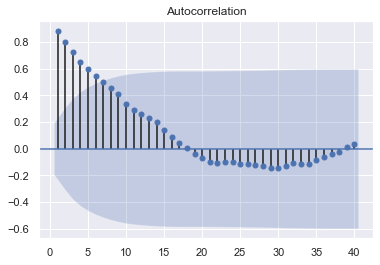

In [53]:
# ACF of differenced data

plt.figure(figsize = (12, 8))
plot_acf(train_data.adjusted_close, lags = 40, zero = False)
plt.show()

In [57]:
# MA ORDER 1
ma1_model = ARMA(train_data.adjusted_close, order = (0,1))
result_ma1 = ma1_model.fit()
print(result_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(0, 1)   Log Likelihood                -216.503
Method:                       css-mle   S.D. of innovations              2.011
Date:                Mon, 27 Jul 2020   AIC                            439.005
Time:                        16:17:33   BIC                            446.880
Sample:                    01-23-2020   HQIC                           442.194
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.8322      0.356    131.455      0.000      46.134      47.530
ma.L1.adjusted_close     0.7968      0.049     16.286      0.000       0.701       0.893
            

In [58]:
# MA ORDER 2
ma2_model = ARMA(train_data.adjusted_close, order = (0,2))
result_ma2 = ma2_model.fit()
print(result_ma2.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma1, result_ma2)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(0, 2)   Log Likelihood                -201.697
Method:                       css-mle   S.D. of innovations              1.739
Date:                Mon, 27 Jul 2020   AIC                            411.393
Time:                        16:17:40   BIC                            421.893
Sample:                    01-23-2020   HQIC                           415.645
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.8590      0.412    113.808      0.000      46.052      47.666
ma.L1.adjusted_close     0.9469      0.095      9.934      0.000       0.760       1.134
ma.L2.adjust

In [59]:
# MA ORDER 3
ma3_model = ARMA(train_data.adjusted_close, order = (0,3))
result_ma3 = ma3_model.fit()
print(result_ma3.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma2, result_ma3)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(0, 3)   Log Likelihood                -183.688
Method:                       css-mle   S.D. of innovations              1.452
Date:                Mon, 27 Jul 2020   AIC                            377.375
Time:                        16:17:46   BIC                            390.500
Sample:                    01-23-2020   HQIC                           382.690
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.8809      0.481     97.413      0.000      45.938      47.824
ma.L1.adjusted_close     0.9840      0.084     11.659      0.000       0.819       1.149
ma.L2.adjust

In [60]:
# MA ORDER 4
ma4_model = ARMA(train_data.adjusted_close, order = (0,4))
result_ma4 = ma4_model.fit()
print(result_ma4.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma3, result_ma4)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(0, 4)   Log Likelihood                -180.868
Method:                       css-mle   S.D. of innovations              1.413
Date:                Mon, 27 Jul 2020   AIC                            373.735
Time:                        16:17:52   BIC                            389.485
Sample:                    01-23-2020   HQIC                           380.113
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.8976      0.537     87.404      0.000      45.846      47.949
ma.L1.adjusted_close     1.0334      0.097     10.646      0.000       0.843       1.224
ma.L2.adjust

In [61]:
# MA ORDER 5
ma5_model = ARMA(train_data.adjusted_close, order = (0,5))
result_ma5 = ma5_model.fit()
print(result_ma5.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma4, result_ma5)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(0, 5)   Log Likelihood                -177.001
Method:                       css-mle   S.D. of innovations              1.360
Date:                Mon, 27 Jul 2020   AIC                            368.002
Time:                        16:17:56   BIC                            386.377
Sample:                    01-23-2020   HQIC                           375.443
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.9478      0.584     80.396      0.000      45.803      48.092
ma.L1.adjusted_close     0.9270      0.101      9.186      0.000       0.729       1.125
ma.L2.adjust

In [62]:
# MA ORDER 6
ma6_model = ARMA(train_data.adjusted_close, order = (0,6))
result_ma6 = ma6_model.fit()
print(result_ma6.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma5, result_ma6)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(0, 6)   Log Likelihood                -173.922
Method:                       css-mle   S.D. of innovations              1.319
Date:                Mon, 27 Jul 2020   AIC                            363.843
Time:                        16:18:02   BIC                            384.843
Sample:                    01-23-2020   HQIC                           372.347
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.9518      0.644     72.962      0.000      45.691      48.213
ma.L1.adjusted_close     0.9524      0.098      9.693      0.000       0.760       1.145
ma.L2.adjust

In [63]:
# MA ORDER 7
ma7_model = ARMA(train_data.adjusted_close, order = (0,7))
result_ma7 = ma7_model.fit()
print(result_ma7.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma6, result_ma7)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(0, 7)   Log Likelihood                -172.147
Method:                       css-mle   S.D. of innovations              1.296
Date:                Mon, 27 Jul 2020   AIC                            362.294
Time:                        16:18:08   BIC                            385.919
Sample:                    01-23-2020   HQIC                           371.861
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.9654      0.679     69.186      0.000      45.635      48.296
ma.L1.adjusted_close     0.9574      0.101      9.460      0.000       0.759       1.156
ma.L2.adjust

In [64]:
# MA ORDER 8
ma8_model = ARMA(train_data.adjusted_close, order = (0,8))
result_ma8 = ma8_model.fit()
print(result_ma8.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma7, result_ma8)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(0, 8)   Log Likelihood                -171.572
Method:                       css-mle   S.D. of innovations              1.289
Date:                Mon, 27 Jul 2020   AIC                            363.143
Time:                        16:18:14   BIC                            389.393
Sample:                    01-23-2020   HQIC                           373.773
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.9698      0.694     67.642      0.000      45.609      48.331
ma.L1.adjusted_close     0.9130      0.117      7.790      0.000       0.683       1.143
ma.L2.adjust

In [65]:
# MA ORDER 9
ma9_model = ARMA(train_data.adjusted_close, order = (0,9))
result_ma9 = ma9_model.fit()
print(result_ma9.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma8, result_ma9)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(0, 9)   Log Likelihood                -165.451
Method:                       css-mle   S.D. of innovations              1.166
Date:                Mon, 27 Jul 2020   AIC                            352.902
Time:                        16:18:28   BIC                            381.776
Sample:                    01-23-2020   HQIC                           364.594
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.0592      0.762     61.722      0.000      45.565      48.554
ma.L1.adjusted_close     0.6320      0.104      6.090      0.000       0.429       0.835
ma.L2.adjust

In [ ]:
res = sm.tsa.arma_order_select_ic(train_data.adjusted_close, max_ar=10, max_ma=10, ic='bic')
print(res)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

In [90]:
resDiff = sm.tsa.arma_order_select_ic(train_data.adjusted_close.values, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')


#sm.tsa.arma_order_select_ic(ts.values,max_ar=6,max_ma=4,ic='aic')['aic_min_order'] # AIC.

In [93]:
sm.tsa.arma_order_select_ic(train_data.adjusted_close, max_ar=7, max_ma=7, ic='aic', trend='c')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site

{'aic':             0           1           2           3           4           5  \
 0  524.073140  439.005417  411.393233  377.375477  373.735324  368.002103   
 1  342.177201  342.721705  344.718962  346.539218  346.485200  346.118429   
 2  342.750156  344.720355  345.281210  346.664592  347.405828  346.334844   
 3  344.688384  344.820412  344.323696  348.197280  348.606622  346.040943   
 4  346.094019  346.324371  348.294130  347.692149  349.011851  352.086071   
 5  346.070870  347.966621  348.654146  349.950428  351.963075  353.502909   
 6  347.836228  348.972063  350.585105  351.386536  353.962962  349.190791   
 7  348.791803  350.369143  349.080622  351.680801  353.641624  352.695401   
 
             6           7  
 0  363.843316  362.294346  
 1  346.984397  348.109278  
 2  347.747887  350.334342  
 3  345.877504  351.522347  
 4  347.741477  349.763256  
 5  348.827446  351.719759  
 6  351.653164  352.644585  
 7  351.767885  353.138387  ,
 'aic_min_order': (1, 0)}

In [28]:
# Note: MA order 6 is performing better than the other

# ARIMA Model

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
# ARIMA (1, 1, 1)
train_data

,confirmed,High,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,
2020-01-23,1,57.980000,227900.0,54.500458,-0.386795
2020-01-24,2,57.799999,146200.0,53.924980,-0.575478
2020-01-27,5,55.689999,230600.0,52.151379,-1.773602
2020-01-28,5,56.090000,174400.0,52.358929,0.207550
2020-01-29,5,55.900002,214500.0,52.104210,-0.254719
...,...,...,...,...,...
2020-06-11,2023656,45.169998,247500.0,43.849998,-2.490002
2020-06-12,2048986,44.590000,244300.0,44.110001,0.260002
2020-06-15,2114026,44.090000,154800.0,43.599998,-0.510002


In [ ]:
# MA ORDER 8
ma8_model = ARMA(train_data.adjusted_close, order = (0,8))
result_ma8 = ma8_model.fit()
print(result_ma8.summary())

In [67]:
# install the package
#!pip install pmdarima
# from pmdarima.arima import auto_arima

In [69]:
import pmdarima as pm

In [76]:
# Fit your model
model = pm.auto_arima(train_data.adjusted_close, exogen = train_data.confirmed)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  102
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -166.715
Date:                Mon, 27 Jul 2020   AIC                            335.429
Time:                        16:29:12   BIC                            338.045
Sample:                             0   HQIC                           336.488
                                - 102                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.5895      0.180      8.845      0.000       1.237       1.942
===================================================================================
Ljung-Box (Q):                       33.51   Jarque-Bera (JB):                 9.93
Prob(Q):                              0.76   Prob(JB):                         0.01
Heteroskedasticity (H):               0.89   Skew:                             0.44
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""